In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [65]:
sns.set(style='white', context='notebook', palette='deep')

In [72]:
train =pd.read_csv("K:\\TensorflowPY36CPU\\TensorflowPY36CPU\\_8_TensorFlowBasics\\Kaggle\\MNIST_example\\train.csv")

In [34]:
test = pd.read_csv("K:\\TensorflowPY36CPU\\TensorflowPY36CPU\\_8_TensorFlowBasics\\Kaggle\\MNIST_example\\test.csv")

In [35]:
Y_train = train["label"]

In [36]:
X_train = train.drop("label",axis=1)

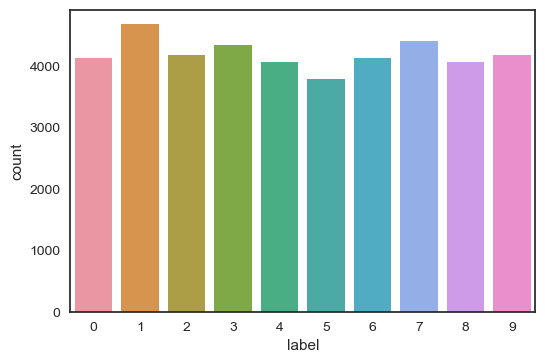

In [37]:
g = sns.countplot(Y_train)

In [38]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [39]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

#No Missing Value

#Reshape

In [42]:
X_train = X_train.values.reshape(-1,28,28,1)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
test = test.values.reshape(-1,28,28,1)

In [47]:
test.shape , X_train.shape


((28000, 28, 28, 1), (42000, 28, 28, 1))

#label Encoding

In [48]:
Y_train = to_categorical(Y_train,num_classes=10)

In [50]:
rand_seed =2

In [51]:
X_train, X_value,Y_train, Y_value = train_test_split(X_train,Y_train,test_size=0.1,random_state=rand_seed)

In [52]:
#see examples

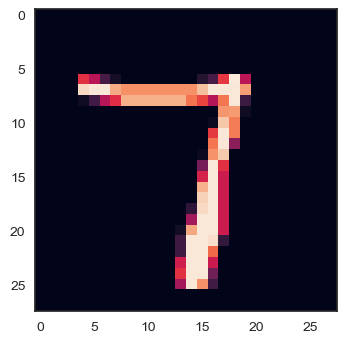

In [58]:
g = plt.imshow(X_train[1][:,:,0])

In [59]:
model = Sequential()

In [60]:
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))

In [61]:
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))

In [62]:
model.add(MaxPool2D(pool_size=(2,2)))

In [63]:
model.add(Dropout(0.25))